In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sys
sys.path.append('../')
import amglib.imageutils as amg
import amglib.readers as amgio
import amglib.plotsupport as ps

import skimage.io as io


In [70]:
x = io.imread('duck.png')[0].astype(float)+1
n = io.imread('frog.png')[0].astype(float)+1

In [71]:
np.max(x)

1.0

In [64]:
s=0.2
nx = x+s*np.random.normal(size=x.shape)
nn = n+s*np.random.normal(size=n.shape)

In [105]:
def color_map_index_transform(img1,img2,N=256, colormixer = [0,1,2]) :
    img1=img1.astype(float)
    img2=img2.astype(float)
    img1=(img1-np.min(img1))/(np.max(img1)-np.min(img1))
    img2=(img2-np.min(img2))/(np.max(img2)-np.min(img2))
    carray = np.zeros([N*N,3])
    carray[:,colormixer[0]] = np.repeat(np.linspace(0,1,N),N)
    carray[:,colormixer[1]] = np.tile(np.linspace(0,1,N),N)
    carray[:,colormixer[2]] = 0.5*(carray[:,colormixer[0]] + carray[:,colormixer[1]])

    cmap = ListedColormap(carray)
    
   # idximg = (N-1)*img2 + img1
   # idximg =  (N-1) * img1
    idximg = ((N*N-1)*img2).astype('uint16') + ((N-1) * img1).astype('uint16')


    return idximg, cmap, carray

dtype('uint16')

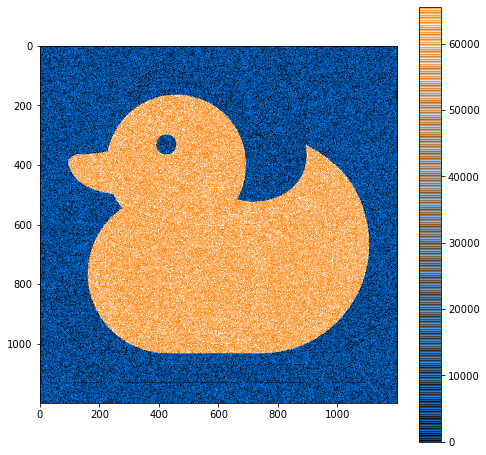

In [106]:
N=256
mix,cmap,carray=color_map_index_transform(nn,nx,N=N,colormixer=[0,2,1])
fig,ax=plt.subplots(1,figsize=[8,8])
a1=ax.imshow(mix,cmap=cmap)
fig.colorbar(a1,ax=ax);
mix.dtype

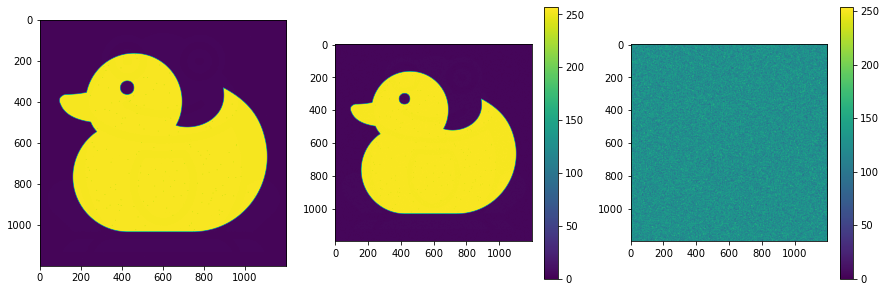

In [107]:
fig,ax=plt.subplots(1,3,figsize=[15,5])

ax[0].imshow(mix)
a1=ax[1].imshow(np.ceil(mix/(N-1)))
a2=ax[2].imshow(np.fmod(mix,(N-1)))
fig.colorbar(a1,ax=ax[1])
fig.colorbar(a2,ax=ax[2])

# Display color map

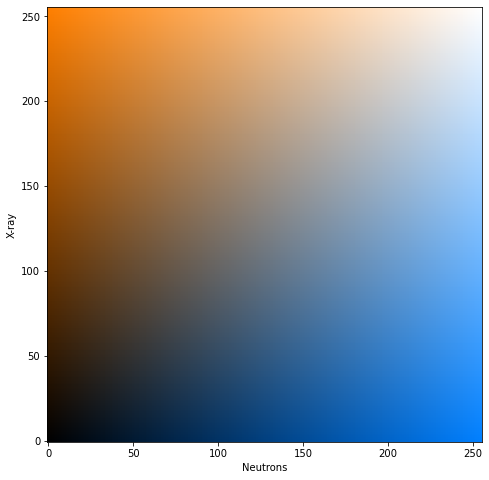

In [108]:
import matplotlib.patches as mpatches
N=256
img=np.arange(0,N**2).reshape(N,N)
fig,ax=plt.subplots(1,figsize=[8,8]);
ax.imshow(img,cmap=cmap,interpolation='none',origin='lower');
#ax.arrow(x=64, y=64, dx=128, dy=128, width=.06)
ax.set_xlabel('Neutrons');
ax.set_ylabel('X-ray');



dtype('float64')